**Exercise: Build decision tree model to predict survival based on certain parameters**
    
CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

<img src="titanic.jpeg" height=50 width=150/>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
X = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis="columns")
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [36]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

Sex_l = LabelEncoder()

X['Sex_l'] = Sex_l.fit_transform(X['Sex'])
X.head()

#male : 1
#female :0

,Pclass,Sex,Age,Fare,Sex_l
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [38]:

X = X.drop("Sex",axis = "columns")
X

,Pclass,Age,Fare,Sex_l
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [39]:

X["Age"].isnull().sum()

177

### dealing with null values in age columns 

In [40]:

X.Age.median()

28.0

In [41]:
#full the null value with media 
X.Age = X.Age.fillna(X.Age.median())
X.Age 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [42]:
X.Age.isnull().sum()

0

In [43]:
X.isnull().sum()

Pclass    0
Age       0
Fare      0
Sex_l     0
dtype: int64

### train test split 

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
model.score(X_test,y_test)

0.776536312849162

[Text(0.38878676470588236, 0.98, 'X[3] <= 0.5\nentropy = 0.956\nsamples = 712\nvalue = [443, 269]'),
 Text(0.1521493212669683, 0.94, 'X[0] <= 2.5\nentropy = 0.805\nsamples = 244\nvalue = [60, 184]'),
 Text(0.03619909502262444, 0.9, 'X[1] <= 24.5\nentropy = 0.157\nsamples = 131\nvalue = [3, 128]'),
 Text(0.027149321266968326, 0.86, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.04524886877828054, 0.86, 'X[1] <= 27.5\nentropy = 0.209\nsamples = 91\nvalue = [3, 88]'),
 Text(0.01809954751131222, 0.82, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.00904977375565611, 0.78, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.027149321266968326, 0.78, 'X[1] <= 26.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.01809954751131222, 0.74, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03619909502262444, 0.74, 'X[2] <= 17.429\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.027149321266968326, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = 

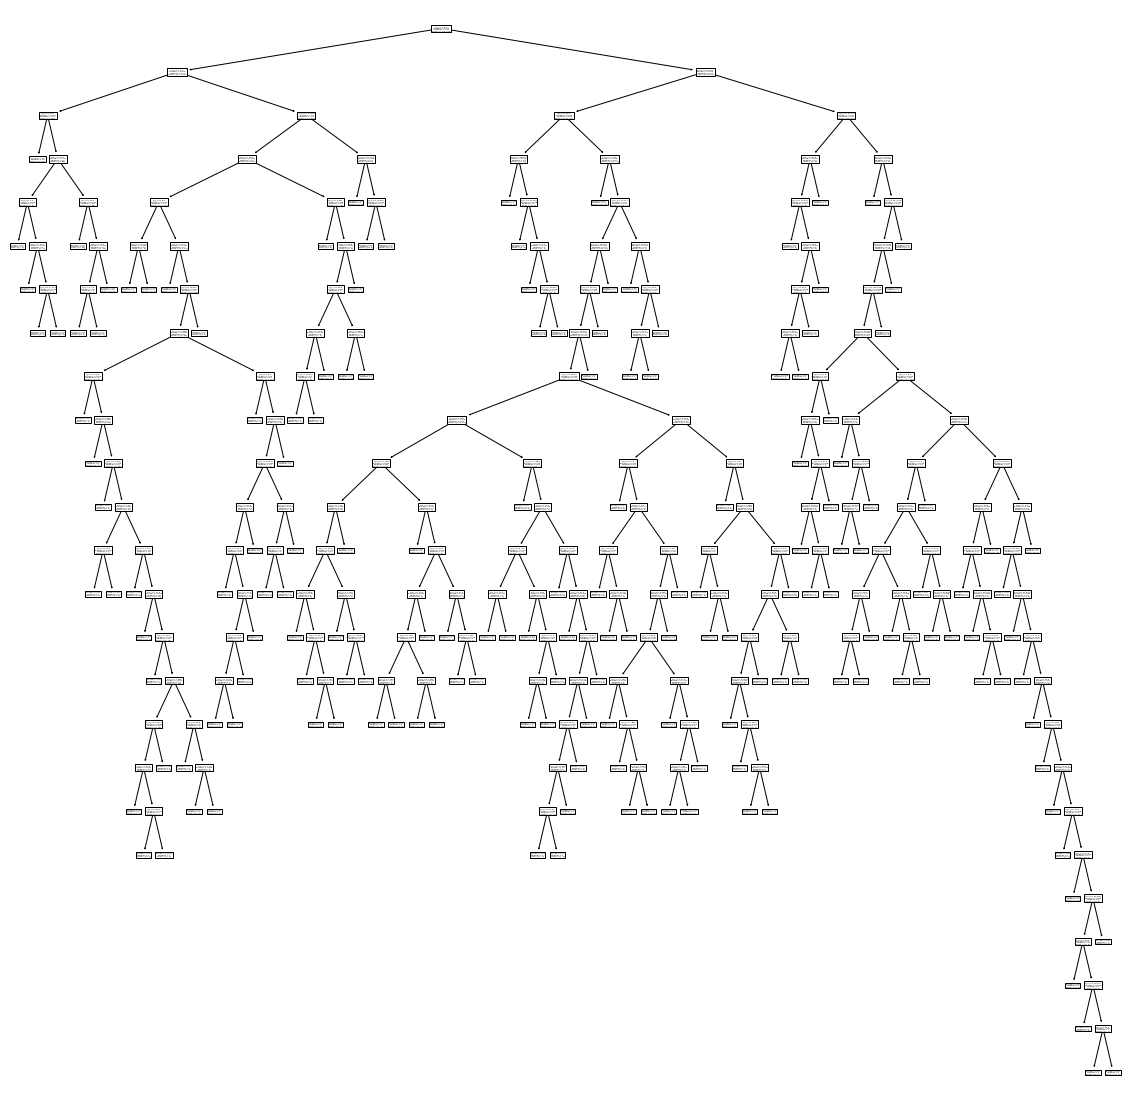

In [53]:
#import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,20))
tree.plot_tree(model)

# creating the random forest classifier


In [58]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators=100 is used to give the number of trees in the forest 

model_RFC = RandomForestClassifier(n_estimators=10)

model_RFC.fit(X_train,y_train)


model_RFC.score(X_test,y_test)

0.7877094972067039